In [1]:
from __future__ import print_function
from rdkit import Chem
from rdkit.Chem import rdmolops
import numpy as np


__urls__ = 'https://raw.githubusercontent.com/wolfiex/DSMACC-testing/master/dsmacc/datatables/smiles_mined.csv'

import pandas as pd
import requests,io
s=requests.get(__urls__).content
df=pd.read_csv(io.StringIO(s.decode('utf-8')))

mol= '[O]OC(=O)C(C)(ON(=O)=O)C(CO)ON(=O)=O'
df[df.name=='INB1NBCO3'].to_dict()


{'Unnamed: 0': {3515: 3515},
 'inchi': {3515: 'InChI=1S/C5H7N2O10/c1-5(4(9)16-14,17-7(12)13)3(2-8)15-6(10)11/h3,8H,2H2,1H3'},
 'name': {3515: 'INB1NBCO3'},
 'smiles': {3515: '[O]OC(=O)C(C)(ON(=O)=O)C(CO)ON(=O)=O'},
 'synonyms': {3515: nan}}

In [2]:

from collections import Counter
included = {}
for smile in df.smiles.values:
    
    try:
        atoms = [str(i.GetSymbol()) for i in Chem.MolFromSmiles(smile).GetAtoms()]
        atoms = Counter(atoms)
        
        
        for i in atoms.keys():
            try:
                included[i] = max([included[i],atoms[i]])
            except:
                included[i] = atoms[i]
        
    except:None
#number or repetitions        
print(included)


{'C': 15, 'Cl': 4, 'O': 12, 'N': 3, 'S': 1, 'Br': 2}


In [3]:
def newgen(letter):  
    number = 0
    while True:
        if number>0:
            yield letter+str(number)
            number += 1
        else:
            yield letter
            number+=1
    

In [4]:

gen = dict(zip(included.keys(),[newgen(i) for i in included.keys()]))
headers = [ gen[i].next()  for i in included for j in range(included[i]) ]
print (headers)

['C', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'C13', 'C14', 'Cl', 'Cl1', 'Cl2', 'Cl3', 'O', 'O1', 'O2', 'O3', 'O4', 'O5', 'O6', 'O7', 'O8', 'O9', 'O10', 'O11', 'N', 'N1', 'N2', 'S', 'Br', 'Br1']


In [5]:
from rdkit.Chem import Draw
from rdkit.Chem import rdDepictor
from rdkit.Chem.Draw import rdMolDraw2D
from rdkit.Chem.Draw import IPythonConsole
from IPython.display import SVG

In [6]:
a= '''
PAN               1
Carb. Acid        1
Ester             1
Ether             1
Per. Acid         1
Hydro peroxide    1
Nitrate           1
Ketone            1
Alcohol           1
'''

print (a)



PAN               1
Carb. Acid        1
Ester             1
Ether             1
Per. Acid         1
Hydro peroxide    1
Nitrate           1
Ketone            1
Alcohol           1



['O', 'O', 'C', 'O', 'C', 'C', 'O', 'N', 'O', 'O', 'C', 'C', 'O', 'O', 'N', 'O', 'O']


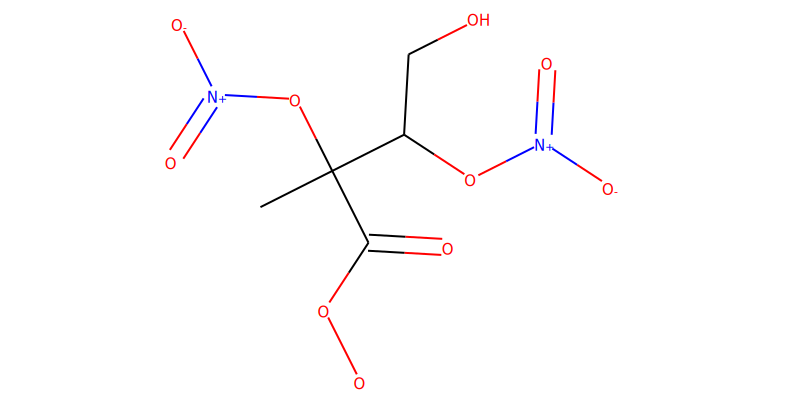

In [7]:
ml = Chem.MolFromSmiles( mol)
rdDepictor.Compute2DCoords(ml)
drawer = rdMolDraw2D.MolDraw2DSVG(800,400)
drawer.DrawMolecule(ml)
drawer.FinishDrawing()
print ([i.GetSymbol() for i in ml.GetAtoms()])
svg = drawer.GetDrawingText().replace('svg:','')
SVG(svg)

In [8]:
def get_basic_matrix(smile,symmetric=True):
    global included
    
    gen = dict(zip(included.keys(),[newgen(i) for i in included.keys()]))
    
    mol = Chem.MolFromSmiles(smile)
    atoms = [gen[i.GetSymbol()].next() for i in mol.GetAtoms()]
    n=len(atoms)
    matrix = np.zeros((n,n))
    for b in mol.GetBonds():
        weight = 1
        if b.GetBondType() == Chem.rdchem.BondType.DOUBLE :
            weight=2
            
            
        matrix[b.GetBeginAtomIdx()][b.GetEndAtomIdx()]= weight
        
        if symmetric:
            matrix[b.GetEndAtomIdx()][b.GetBeginAtomIdx()]= weight
        
        
        
        
    return pd.DataFrame(matrix,columns=atoms,index=atoms,dtype='i4')


print(get_basic_matrix(mol))#C1013PAN

    O  O1  C  O2  C1  C2  O3  N  O4  O5  C3  C4  O6  O7  N1  O8  O9
O   0   1  0   0   0   0   0  0   0   0   0   0   0   0   0   0   0
O1  1   0  1   0   0   0   0  0   0   0   0   0   0   0   0   0   0
C   0   1  0   2   1   0   0  0   0   0   0   0   0   0   0   0   0
O2  0   0  2   0   0   0   0  0   0   0   0   0   0   0   0   0   0
C1  0   0  1   0   0   1   1  0   0   0   1   0   0   0   0   0   0
C2  0   0  0   0   1   0   0  0   0   0   0   0   0   0   0   0   0
O3  0   0  0   0   1   0   0  1   0   0   0   0   0   0   0   0   0
N   0   0  0   0   0   0   1  0   1   2   0   0   0   0   0   0   0
O4  0   0  0   0   0   0   0  1   0   0   0   0   0   0   0   0   0
O5  0   0  0   0   0   0   0  2   0   0   0   0   0   0   0   0   0
C3  0   0  0   0   1   0   0  0   0   0   0   1   0   1   0   0   0
C4  0   0  0   0   0   0   0  0   0   0   1   0   1   0   0   0   0
O6  0   0  0   0   0   0   0  0   0   0   0   1   0   0   0   0   0
O7  0   0  0   0   0   0   0  0   0   0   1   0 

['C', 'C1', 'C2', 'C3', 'C4', 'N', 'N1', 'O', 'O1', 'O2', 'O3', 'O4', 'O5', 'O6', 'O7', 'O8', 'O9']     C  C1  C2  C3  C4  N  N1  O  O1  O2  O3  O4  O5  O6  O7  O8  O9
C   0   1   0   0   0  0   0  0   1   2   0   0   0   0   0   0   0
C1  1   0   1   1   0  0   0  0   0   0   1   0   0   0   0   0   0
C2  0   1   0   0   0  0   0  0   0   0   0   0   0   0   0   0   0
C3  0   1   0   0   1  0   0  0   0   0   0   0   0   0   1   0   0
C4  0   0   0   1   0  0   0  0   0   0   0   0   0   1   0   0   0


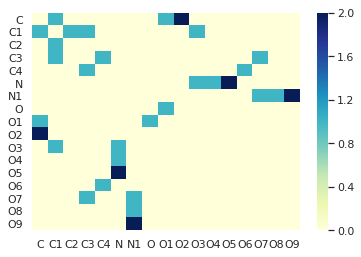

In [26]:
import numpy as np; np.random.seed(0)
import seaborn as sns; sns.set()
df =get_basic_matrix(mol)

l = list(df.columns)
l.sort()
df=df[l]
df.sort_index(inplace=True)

print(l,df.head())

sns.heatmap(df, cmap="YlGnBu")
import matplotlib.pyplot as plt
plt.show()

In [18]:

def get_full_matrix(smile,flat=False):
    '''
    Flat = flattens the unsymmetric string of the graph adjacency matrix (As this is symmetric we dont need to supply the data twice)
    
    NB - alternatively rather than representing double edges with a 2, we may add a reverse edge?
    '''
    
    print(smile)
    
    global included,headers
    
    try:
        gen = dict(zip(included.keys(),[newgen(i) for i in included.keys()]))

        mol = Chem.MolFromSmiles(smile)
        atoms = [gen[i.GetSymbol()].next() for i in mol.GetAtoms()]

        n=sum(included.values())
        matrix = np.zeros((n,n))


        for b in mol.GetBonds():
            weight = 1
            if b.GetBondType() == Chem.rdchem.BondType.DOUBLE :
                weight=2


            matrix[headers.index(atoms[b.GetBeginAtomIdx()])][headers.index(atoms[b.GetEndAtomIdx()])]= weight



        if flat: 
            flat = []
            for i in range(n):
                flat.extend(matrix[i,i+1:])
            return flat



        else:return pd.DataFrame(matrix,columns=headers,index=headers,dtype='i4')
    except:return False



In [19]:
print(get_full_matrix(mol).head())

[O]OC(=O)C(C)(ON(=O)=O)C(CO)ON(=O)=O
    C  C1  C2  C3  C4  C5  C6  C7  C8  C9  ...  O8  O9  O10  O11  N  N1  N2  \
C   0   1   0   0   0   0   0   0   0   0  ...   0   0    0    0  0   0   0   
C1  0   0   1   1   0   0   0   0   0   0  ...   0   0    0    0  0   0   0   
C2  0   0   0   0   0   0   0   0   0   0  ...   0   0    0    0  0   0   0   
C3  0   0   0   0   1   0   0   0   0   0  ...   0   0    0    0  0   0   0   
C4  0   0   0   0   0   0   0   0   0   0  ...   0   0    0    0  0   0   0   

    S  Br  Br1  
C   0   0    0  
C1  0   0    0  
C2  0   0    0  
C3  0   0    0  
C4  0   0    0  

[5 rows x 37 columns]


In [12]:
print(get_full_matrix(mol,flat=1))

[O]OC(=O)C(C)(ON(=O)=O)C(CO)ON(=O)=O
[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.

In [13]:
flat_list = dict(zip(df.name.values,[get_full_matrix(s,flat=1) for s in df.smiles.values]))

O=CCC(=O)C1CC(ON(=O)=O)C1(C)C
OCCC(=O)C(=O)C(=O)C(C)(C)C(=O)CCC(=O)C
CCCCOC(=O)C
CCCCCCC(=O)C(O[O])CC(=O)CC
CCC(C)(O)C(=O)OON(=O)=O
OCC1(OO)CC\C=C(\C)/CCC2C1CC2(C)C
OC(=O)C(C)(C)O
CC1=CC([O])(O)C2(OOC1(C)C2O)N(=O)=O
CCC(=CC(=O)O)C=O
CC(=CC(=O)CC)C1OC1(C)C=O
OOC1(O)C(=C(N(=O)=O)C2(OOC1(C)C2O)N(=O)=O)C
O=N(=O)OC(C)(C)C(C)(C)O
[O]OC(=O)CC1CC(C(=O)CO)C1(C)C
CC(=O)C(C)(C)[O]
CC([O])C(C)O
O=CC(CCC(=O)O)C(=C)C
OOCC(O)C(C)C
[O]OC1C=CC2(C)OOC1(CC)C2O
Cc1ccc(C)c(O)c1O
CCCC(C)(CC)ON(=O)=O
CCCCCCC(=O)C(O)CC(=O)CC
CCCC(=O)OCC=O
O=C1C=CC(=O)C(=C1)C
OC(C(=O)C)C([O])C1OC1(C)C(=O)C
O=CCC(=C)C1CC(C)(C)C1CCC(=O)O
nan
nan
OCC(OO)C(C)(C)O
O=N(=O)OC(C)C(C)(C)[O]
O=CC1OC1C(=O)O
CCCC([O])OC(=O)C(=O)C
[O]CC(O)C(C)C
OOC(=O)C(O)Cl
CCCCOC(=O)C(=O)C
O=CC=CC=O
CCC(C)(O)CC(=O)OON(=O)=O
CCC12OOC(CC)(C=C(C)C2(O)OO)C1O
CCCCC(O)C(=O)OON(=O)=O
CCCC(O)CC(=O)OON(=O)=O
OCCC(O)C(C)O[O]
CCC(=O)C(OO)C(O)C1OC1C=O
[O]Oc1c(CC)cc(C)cc1N(=O)=O
OOC(C(=O)C)C(O)C(=O)C
CCC(=O)C=C(C)C(O[O])C(=O)CC
OC1C=CC2(OOC1C2O)C(C)C
CCCC(=O)C
CC(=O)

nan
Cc1ccc([O])c(C)c1C
Cc1cccc(C)c1C
O=CCCC(=C)C(=O)CC(C)(C)C(OO)CCO
OCC(=O)OON(=O)=O
OOCCC(=O)OC
O=CCCC(=O)C(C=O)C(C)(C)ON(=O)=O
CCC12OOC(C2O)C(O)(O)C=C1
[O]OC1(O)C=CC2(CC)OOC1C2O
[O]OC(C)(C)C=O
O=CC(O)C(C)([O])C(=O)C
CC(=O)CCC(=O)C(C)(C)CO[N+](=O)[O-]
O=CC1OC1C(O)C([O])C(=O)C(C)C
CCCCCC(OO)CCC(O)CC
CCCCC(O)COO
CCC12OOC(C=C(N(=O)=O)C2(O)O[O])(N(=O)=O)C1O
CCCC=O
OOC(=O)C(C)(ON(=O)=O)C(O)CON(=O)=O
CCC(O)CC(=O)CO[O]
OOC1(O)C=CC2(CC)OOC1C2O
[O]OC1(CON(=O)=O)CCC2CC1C2(C)C
CCC(O)CC(=O)C(C)OO
CCC(C)([O])CC
[O]OC(=O)C(C)(ON(=O)=O)C(=O)CON(=O)=O
O=CCC(=O)C(CC=O)C(C)(C)O[O]
CC(C)(C)C
OCC(ON(=O)=O)C(C)C
OOCC(C)C(C)CO
CCC12OOC(N(=O)=O)(C(=C(N(=O)=O)C2(O)O[O])C)C1O
O=CC(=O)CC(=O)C(C)(ON(=O)=O)C(=O)OON(=O)=O
O=N(=O)OCC(O)C(C)(ON(=O)=O)C(=O)OON(=O)=O
OC(=O)CCC(CC(=O)OO[N+](=O)[O-])C(=C)C
O=CCC1C(O[N+](=O)[O-])CC1(C)C
OCC(ON(=O)=O)C(=C)C
O=N(=O)OCC([O])C(C)(C)O
O=COC(C)(C)CO
[O-][N+](=O)OOC(=O)C(CCO)C(=C)C
CCCC(=O)C=CC(=O)C=O
OOC1C(=O)OC(C)C1O
OOC1C2C(=O)CC(=O)C1C2(C)C
OOC(=O)C(C)(ON(=O)=O)C(CO)ON(=O

Oc1ccccc1
[O]Oc1ccc(C)cc1C
OOc1c(CC)cccc1N(=O)=O
[O-][O+]=C(C)C=O
[O]OC1(O)C=CC2OOC1C2O
OCC(C)(ON(=O)=O)C(ON(=O)=O)C(=O)O
O=CCC(=C)C1CC(C)(C)C1CCC(=O)C
CC(O)COC(=O)C
O=CC(=O)C
ClC(CCl)C=O
[O]OCC(O)C(=O)CO
O=CC(O)C=CC(=O)C(C)C
[O]OCBr
OCC(CC(O[O])C(=O)O)C(=O)C
CC(=C)C([O])CO
OOC1(C)C(=O)C=C(C)C(=O)C1O
O=CCC(CC=O)C(C)(C)[O]
OCCC(=O)C(=O)CC(C)(C)C(O)CC=O
O=CCC(CC(=O)OO[N+](=O)[O-])C(=O)C
CCC12OOC(C(=O)C=C1)C2O
CC(O)(C1CO1)C(=O)O[O]
OOC1(O)C=CC2(OOC1C2O)C(C)C
O=CC(C)(O)C=CC(=O)C
OC(Cl)C([O])(Cl)Cl
OCCC(=C)C(=O)CC(C)(C)C([O])CC=O
OC(=O)CCC(CO[N+](=O)[O-])C(=C)C
OCCC(=O)C(=O)CC(C)(C)C(=O)CCC(=O)O
[O]Oc1c(C)c(C)c(C)cc1N(=O)=O
CC(O)(CC(=O)OO)CC
OOC1(O)C(=C(C)C2OOC1(C)C2ON(=O)=O)C
[O]OC(C=O)C(C)(C)C=O
CCCC(ON(=O)=O)C(C)O
OOC(C)(C=O)C(O)C(=O)C
O=C1C(O)C(=O)C(=O)C(=C1C)C
OCCC(O)C(C)ON(=O)=O
[O]OC(C)(C=O)C=CC(=O)C
CCOC(C)ON(=O)=O
OOC(=O)C=C(C)CON(=O)=O
OCC(C)CC(C)O
O=C1CC2CC1C2(C)C
O=CCCC(=C)C1(O[N+](=O)[O-])CC(C)(C)C1CCO
OCCC(=O)C(=O)CC(C)(C)C(O)CCC(=O)C
OCCC(=O)C(=O)CC(C)(C)C(O[O])CC=O
[O]OCC(=O

O=CCC1CC(C(=O)C[O])C1(C)C
CCC([O])c1ccccc1
O=CC(O)C(=O)C(=CC(=O)OON(=O)=O)C
O=N(=O)OCC(C)(O)C(=O)O
CCC1=CC(O)(O[O])C2(OOC1C2(C)O)N(=O)=O
[O]OC(C)C(=O)c1ccccc1
OOc1ccccc1N(=O)=O
O=N(=O)OCC1CC(C(=O)O)C1(C)C
CCC=O
OCC(ON(=O)=O)C(C)(O)C(=O)OO
OCC(OO)(Cl)Cl
[O]OC(Cl)C(O)(Cl)Cl
[O]OC(C=O)C(O)(CO)CO
O=CCC(CO)C(C)([O])CO[N+](=O)[O-]
O=CC1(C)OC1(C)C(O)C(O)C(=O)C
CCc1cc(C)cc(O)c1OO
OCCC(=C)C1CC(C)(C)C1CCC(=O)O
[O]OCCC(=C)C1CC(C)(C)C1CCC(=O)O
[O]OC(C(O)C(=O)C)C1(C)OC1(C)C=O
CC1(OC1(C)C(=O)O[O])C=CC(=O)C
OOC(C)(C=O)C=O
[O]Cc1cccc(C)c1
CC(CC(=O)C)CO
CC(=C)COO
CCCCCCCCCC([O])CC
CCC(=O)C(O)CC
CC(=O)C([O])Cl
OCC(CCC(=O)O)(O[N+](=O)[O-])C1CC(C)(C)C1CCC(=O)C
CC(O[O])C(=O)CC(=O)C(=O)C
OOC(=O)C(CCC(=O)C)C(=C)C
CCCC(=CC(=O)C=O)C(=O)O[O]
CCOCOO
CCCC(=O)OCOO
CC(=O)CCC(C(=C)C)C(=O)OO[N+](=O)[O-]
CCCC1OC(=O)C(OO)C1ON(=O)=O
[O]CC(CCC(=O)O)C(=O)C
OOc1c(CC)ccc(C)c1O
OOC1(O)C(=CC2(OOC1C2ON(=O)=O)N(=O)=O)N(=O)=O
O=N(=O)C1=CC2(C)OOC(C2O)C1([O])O
OCC(CC(=O)O)C(=O)C
CC1(OC1C(=O)OO)C=CC(=O)C
[O]OCC(=O)OC=O
CCc1c(C)ccc(

OCC(=O)C(O)C(=O)OON(=O)=O
[O]OC/C=C(\CO)/C
CCCC(O[O])C(C)ON(=O)=O
OCC(=C)C(CO)OO
O=COC=CC(=O)OO
CCCCC(=O)O[O]
CC(=O)C(C)([O])C(=O)C
[O]OCC(C)(C)C(=O)C
CC(=O)C=CC(=O)C(=O)C
[O]OC(C)(OC(=O)C)C(=O)C
O=C1CC=C(C)C(O)C1
COCC(=O)C
[O-][O+]=C(C)CC
CCCC(=O)C(=O)C(O)C(=O)OO
OOC(=O)C(CC)OC(=O)C(=O)C
O=N(=O)OCc1cc(C)cc(C)c1
[O]OCC(=O)C=C(C(=O)CO)CC
OCC1(CC\C=C(\C)/CCC2C1CC2(C)C)O[N+](=O)[O-]
CCc1ccc(C)c(N(=O)=O)c1[O]
OOC(CC(=O)C)C(C)(C)O
O=N(=O)OC1(C)C(=O)CC2([O])CC1C2(C)C
[O]CC1CC(C(=O)C)C1(C)C
CCC(O)CCC(=O)O
OOC(=O)C(O)C(C)(C)O
CCCC1=CC(=O)C=CC1=O
CC([O])CC=O
CC(C)CC(=O)C
OCC(=O)C=C(C(=O)CO)CC
ClC(=C)Cl
[O]OC(=O)C(C)(O)C(O)CON(=O)=O
CCCCO
OOCCC(=C)C1CC(C)(C)C1CCC(=O)O
OCC(=O)C(CO)(CO)OO
CCCC(O[O])C=O
OC(=O)CCC(=C)C1CC(C)(C)C1CCC(=O)O
CCC12OOC(C)(C(=C(O)C2(O)O[O])N(=O)=O)C1ON(=O)=O
[O]OC(C)CCC(C)O
O=C1CC(=O)C(C)(ON(=O)=O)C(=O)C1
OC(CCC=O)C[O]
[O]OC(C)(C)C(C)(C)O
OOCC(O)CO
O=CC(=O)C(=O)C(C)C
O=CC1(C)OC1(C)C=CC(=O)C
O=CCC=O
CCCc1ccccc1O
O=CCC(CCC(=O)C)C(C)(O)CO[N+](=O)[O-]
OCC(ON(=O)=O)CC(=O)C(=O)C

CCOC[O]
OC(=O)C(O)Cl
CCC(OO)COC(=O)C
OOC(C(=O)C)C(O)C1(C)OC1C=O
[O]CC(C)(C)ON(=O)=O
[O]CC(=O)C(C)CO
[O]OC(=O)C(C)(C)C(=O)C(=O)CC(=O)C
[O]OCCC(=O)C
[O]OC1(O)C(=C(N(=O)=O)C2OOC1(C(C)C)C2ON(=O)=O)O
CCCC(=O)COO
CC(O[O])(C=CC=O)C(=O)CC
CCC12OOC(C)(C=CC1[O])C2O
CC([O])(CC=O)C(C)O
CC(=O)OCC(=O)OO
CC(O)(C=CC=O)C(=O)CC
O=CCC(CC(OO)C(=O)C)C(=C)C
CC(=O)CCO
OOC(C)(C=O)CC(=O)C
CCCC(=O)C(OO)C(O)C=O
CC(O)(CC)C=O
O=CC(C)([O])C(=O)C
OCC(=O)C(=O)C=O
OOC1(C)C(=O)OC(C)C1ON(=O)=O
CS(=O)(=O)C
CCCC(=O)CC
OCC(C)(C)C(=O)C([O])CC(=O)C
[O]C(CCCO)C=O
OOCCC(=C)C1CC(C)(C)C1CC=O
OOCC(=O)c1ccccc1C
CCC(=O)CC([O])C(O)CC
OCC(=O)C(C)(C)C=O
CCC(=O)C(C)[O]
[O-][N+](=O)OC1CC(CCC1(C)OO)C(=C)C
CC([O])(Cl)Cl
CC(=O)CC([O])C(=O)C(=O)C
O=CCCC(=C)C(=O)O
CCCC(=O)C=CC(=O)OO
ClC(Cl)C(Cl)Cl
OCCO[O]
O=N(=O)OCC([O])c1ccccc1
O=CCCC(=O)C=O
O=N(=O)OOC(=O)C(C)(O)C1OC1
[O]OCC(=O)C(C)(C)C=O
CCC(=O)C(O)C(C)([O])C1OC1(CC)C=O
O=CCC(C)ON(=O)=O
CCc1cc(C)cc(c1)C(C)ON(=O)=O
CC(=C)C(CC=O)C[O]
OCCC(C)C
OOC(C)C(=O)CON(=O)=O
O=N(=O)c1ccc(O)c(O)c1
CCOC(C

O=CCC(CC(O[O])C(=O)C)C(=O)C
CC1=CCC(CC1O)C(C)(C)[O]
O=CCC(CC(O)C(=O)C)C(=O)C
OOCC(O)CCC=O
O=C1C=C(C(C)C)C(=O)C(O)C1O
OOS(=O)(=O)C
O=CC1(C)OC1C(=O)C
O=CCC(=O)C([O])CC=O
CCC(O[O])CC(=O)CON(=O)=O
CC(CO[O])CC
CCCC12OOC(C2O)C(O)(O[O])C=C1
CC1=CCC2CC1C2(C)C
[O]OC1CCCCC1
CC(=C)C[O]
O=N(=O)OOC(=O)C(C)C(C)C
OCC(C)C(C)C(=O)OON(=O)=O
CC(CCCC)OO
CCC(C)CC(=O)OON(=O)=O
O=C(OON(=O)=O)CC(C)C(C)O
O=N(=O)OOC(=O)CC(C)C(=O)C
OCCC(C)(C)C(=O)OON(=O)=O
OCC(C)(C)CC(=O)OON(=O)=O
CCC(C)(C)C(=O)OON(=O)=O
O=N(=O)OOC(=O)C(C)(C)C(=O)C
O=N(=O)OOC(=O)CC(C)(C)C
O=CCCC(=O)C(C=O)C(C)(C)O[O]
CCCC(=O)C=O
OCc1ccccc1
CCC(O)OC(=O)C(=O)C
CC(=O)OC(=O)C(=O)C[O]
CCC(O[O])OC(=O)C(=O)C
CCC(C)(OO)C(=O)C
[O]OCc1ccccc1
O=CCCC(=O)C(C=O)C(C)(C)O
O=N(=O)OC(C)(C)C(C)[O]
OCCC(C)(C)COO
O=CCC(=O)C(CC=O)C(C)(C)OO
OOC(=O)C1OC1C=O
O=CCC(CCC(=O)C)C(C)(CO)OO
[O-][O+]=CCON(=O)=O
O=CCC(CCC(=O)C)C(=[O+][O-])C
OC1C([O])C(=O)C(=C(C)C1=O)C
O=CCC(CCC(=O)C)C(C)(OO)CO[N+](=O)[O-]
[O]OCC(C)C
CCCC(=O)C(=O)C(O)C1OC1C=O
O=CC1C(=O)CC(=O)C(=O)C1(C)C
O=COC=O
[O

C=CC(O)C(=O)OON(=O)=O
O=N(=O)OCC=CC(=O)OON(=O)=O
O=CC1C(=O)CC(=O)C(O)C1(C)C
CCOCCON(=O)=O
OOCCCC(C)(C)O
CCC(=O)C(C)(C)OO
[O]OCCC(=O)CC=O
CC(OO)C=O
O=CCC([O])C(=O)C
OCCC(=C)C(=O)CC(C)(C)C(O)CCC(=O)O
[O]CC(=O)CC=O
[O-][O+]=CC(=O)CO
[O]CC(CCC(=O)C)C(=O)C
[O]OC(C)(CC(=O)C)C(=O)C
OCC(ON(=O)=O)C(C)(ON(=O)=O)C(=O)O
CC1OC(=O)C(C)([O])C1O
[O]CCC(O)CC
OOC(Cl)C(O)(Cl)Cl
OOC1CC(=O)C2CC1C2(C)C
CC(CC(=O)C(=O)C)O[O]
O=N(=O)OOC(=O)C=CC(=O)C
[O]OC1C(=O)CC(=O)C(C=O)C1(C)C
O=CCCC(=O)C1([O])CC(C)(C)C1CCO
[O]OC1(C)C(ON(=O)=O)CC2CC1C2(C)C
OCC(=O)C1(OO)CC(CO)C1(C)C
O=CCCC(=O)C1CC(C)(C)C1CCC(=O)C[O]
CC(OO)C(=O)OC(=O)C(=O)C
CC(=O)CC(O)C(C)O
OCC(CC(OO)C(=O)O)C(=O)C
CC1(O[O])C(O)C(=O)OC1=O
O=CC(CCC(=O)C)C(C)(CO)O[O]
OC(=O)Cc1ccccc1
[O]CCCC(C)(C)O
nan
CCC(=O)C(O)C(O)C=O
[O]OC1(C)C(ON(=O)=O)C(=O)C(=C(C)C1=O)C
CCCC(ON(=O)=O)C(C)O[O]
[O]OCC(C)ON(=O)=O
CCCCCCCC(O)CC(=O)OON(=O)=O
O=N(=O)OOC(=O)CC1CC(C(=O)C)C1(C)C
CC([O])OC(=O)C(=O)C
CCCC(C)[O]
CC(O)(CCO)C=O
OOC(OC(=O)C)C(=O)C
O=CC([O])C=O
O=N(=O)OC1C=CC2(C)OOC1C2O
CC(

OCC(OO)CC(=O)C
CCCC12OOC(C2O)C(O)(OO)C=C1
CCc1ccccc1
O=CC(C(=O)CC(=O)O)C(C)(C)C=O
CCc1cc(C)cc(c1)C(=O)C
OCCC(=O)C1(O[O])CC(C)(C)C1CC=O
[O]CC(=O)c1cc(CC)cc(C)c1
OOC1C(=O)OC(=O)C1O
OCC(=C)C(=O)O
CC(OO)C(=O)C
O=N(=O)OC1C(=O)C(=C(C)C(=O)C1(C)[O])C
CCC1(O)C(=O)C=C(C)C(=O)C1O
OOC(=O)CC1CC(C(=O)O)C1(C)C
OOC1(O)C(=C(C)C2(OOC1(C)C2O)N(=O)=O)N(=O)=O
[O-][O+]=CCC(CCC(=O)C)C(=C)C
O=CCC(CCC(=[O+][O-])C)C(=C)C
CC(=O)CC(C)([O])C(=O)C
OOCOC(C)(C)C
CC(=C)CC(=O)OO
OOC1(C)C(ON(=O)=O)C(=O)C(=C(C)C1=O)C
CCC1(O[O])C(=O)C=C(C)C(=O)C1O
O=CC(O)C(O)C(=O)C
[O]OC(C)C(=O)C(=O)CC(=O)C
O=N(=O)OCC(O)C(C)(O)C(=O)O
[O]OC1(C)C=CC2(C)OOC1C2O
[O-][O+]=C(O)C(=C(C)/C=C/C(=O)O)C
OCCC(=O)C1(O)CC(C)(C)C1CC=O
OOC(=O)CC(C)C(C)O
O=CC(=C(CC)C(=O)[O])N(=O)=O
O=CCC(=O)C(CC=O)C(C)(C)[O]
COC(=O)CCC1C([O])CC1(C)C
CC(CC(=O)OCC(=O)C)O[O]
O=CCCC(=[O+][O-])C1CC(C)(C)C1CCC(=O)OC
CC(=O)CCC1C(CC1(C)C)C(=O)C([O])CC(=O)O
O=N(=O)OC1C2(OOC1(C)C([O])(O)C(=C2C)N(=O)=O)N(=O)=O
OOC1CCC(=C)C2CC(C)(C)C2CCC1(C)O
CCC(=O)CC(=O)C(=O)CC
O=CC(=O)C=C(CC)C(=O)

CCCC12OOC(C(=C(O)C2(O)OO)N(=O)=O)C1ON(=O)=O
O=CCC(C(=O)C)C(C)(C)OO
O=CC(C)(ON(=O)=O)C(=O)O
CCC(OO)CON(=O)=O
O=CCCC(=O)C(=O)CC(C)(C)C(O)CCO
[O]OC(=O)CCC(=C)C1CC(C)(C)C1CCC(=O)C
CCCC(=O)C=CC1OC1C=O
OCC(O)C(C)(OO)C=O
O=N(=O)c1c(C)cc(C)c(O)c1O
O=N(=O)C1=C(O)C([O])(O)C2(C)OOC1(C)C2O
OOCC=C(C)CO
[O-][N+](=O)OC1(C)CCC2C(CC2(C)C)C(=O)CCC1O
CCC(=O)C(O)CC(=O)C
CCC(O[O])C(C)ON(=O)=O
ClCC(=O)Cl
O=CCCC(O)CC(=O)OO
CC(O)C(C)C(=O)C
[O]OC(C)C(C)C(=O)C
[O]CC(=O)C(=C)CCC=O
CC(OO)C(=O)CC(O)CCC
OCC(O)C(=O)OON(=O)=O
[O]C1CCCCC1
OCCC(O)C(C)[O]
CCC1=CC([O])(O)C2(OOC1C2(C)O)N(=O)=O
OCC(=O)C(=O)CC(CO)C(C)(C)O[O]
O=CCCC(=O)C(=O)CC(C)(C)C(O[O])CCO
Cc1cc(C)cc(c1)C(C)[O]
OCC(=O)C(CO)O[O]
O=CCC(=O)CC(C(=O)C)C(C)(C)OO
CC(=C)C(CO[O])O
OCCCC(C)(O)CC
[O]OCC(Cl)CCl
CCCC(C=O)ON(=O)=O
OCC(ON(=O)=O)C(=O)C=O
CCC([O])C(C)C
OCCC(C)(O)CON(=O)=O
CC(=O)C(C)(C)O
OCC(O)CC(O[O])C=O
OCC(=O)O
CC(=O)C=CC1OC1C(=O)O
[O]OC(=O)C(C)(OO)C(CO)ON(=O)=O
[O]OC(=O)COC(=O)C(=O)C
OC(C=C)C(=O)OO
CCC(C)C(=O)C
[O-][O+]=CCC(=O)OC(=O)C
OCC(OO)C=C
O=CCC1

CC(CO)C=O
CCC(C)(O)CON(=O)=O
CCCCC(C)ON(=O)=O
CCC12OOC(C)(C=C(C)C2(O)O)C1O
CCCC(O[O])OCC(=O)C
CC(CC(=O)C(=O)C)OO
OCC(ON(=O)=O)C(=[O+][O-])C
OOC1C(=O)OCC1ON(=O)=O
OOCCC(=C)C1CC(C)(C)C1CCC(=O)C
[O]CC(=O)C(C)C(C)O
[O-][O+]=C(CCC(=O)O)C1CC(C)(C)C1CCC(=O)C
[O]CC(=O)C(C)O
CC(=O)C(C)(C)C(=O)O
OOCC(=O)C1CC(CC=O)C1(C)C
ClCC([O])Cl
O=N(=O)OCC([O])C(C)C
CCCCC(C)(C)ON(=O)=O
CCCC(ON(=O)=O)C(C)[O]
CCC(=CC(=O)OO)C(=O)C(O)C=O
O=CCCC(=C)C1CC(C)(C)C1CC(O[O])C(=O)C
[O-][N+](=O)OOS(=O)(=O)C
O=CCCC(=C)C1CC(C)(C)C1CC(O)C(=O)C
OOCC(C(C=O)O[O])(OO)C
CCCC(=C(C=O)N(=O)=O)C(=O)O
O=CCC(OO)C(=O)C1CC(C)(C)C1CCC(=O)C
CCCC(O)C[O]
O=N(=O)C1=C(C)C2(C)OOC(N(=O)=O)(C1([O])O)C2(C)O
CCCON(=O)=O
OCC1=CCC(CC1)C(C)(C)[O]
O=N(=O)OC(C)(C)C(=O)C
OCC(=O)C(C)C
[O]Oc1cccc(C)c1
OOCC(O)(Cl)Cl
[O]OC(CCC(=O)C)C(=C)C
CCC12OOC(N(=O)=O)(C(=C(O)C2(O)OO)C)C1O
OCCC(=C)C(=O)O
O=CCC(CO)C(C)([O])CO
OCCC(=C)C1(OO)CC(C)(C)C1CCC(=O)O
O=CC(=O)C=C(C(C)C)C(=O)OO
OOCc1cccc(C)c1
OCC(C)(O[O])C(=O)CCC(=O)C
O=CC(CCC(=O)O)C(=O)C
[O-][N+](=O)OOC(=O)C(CCO)C(

CCOC(=O)COO
[O-][O+]=CC(=O)CCC
CCC(=O)CCC(=O)OON(=O)=O
CCCC(C)C(=O)OON(=O)=O
CCC(O)CCC(=O)OON(=O)=O
CCC(=O)C(C)C(=O)OON(=O)=O
O=N(=O)OOC(=O)C(C)C(=O)C(=O)C
CC(O)CC(C)C(=O)OON(=O)=O
OCC(CC(=O)O)C(=C)C
OCCC(=O)C1(O)CC(C)(C)C1CCC(=O)O
O=C(OON(=O)=O)CCC(C)(C)O
O=N(=O)OOC(=O)CC(=O)C(C)(C)O
CC(O)CON(=O)=O
CCC(C)O
CCC(=CC(=O)C(O)C(=O)C)C(=O)OO
CCCC12OOC(C=C(N(=O)=O)C2(O)O[O])(N(=O)=O)C1ON(=O)=O
CCCC(ON(=O)=O)C(=O)O[O]
CC(CCC)C=O
[O-][O+]=CC(=O)C
[O-][O+]=CC(=O)C
[O-][O+]=CC(=O)C
OCCC(=O)C1(O[O])CC(C)(C)C1CCC(=O)O
OOC(=O)C(C)(O)C(=O)C(=O)C
O=N(=O)OC1COC(=O)C1(C)[O]
CC(=O)C=C
[O-][O+]=C(C)CO
CCC1OC(=O)C(C)(OO)C1ON(=O)=O
CC(=O)OCCC(C)ON(=O)=O
O=CCC(CO[N+](=O)[O-])(OO)C
OOC(=O)C(C)CC(C)O
CCC(OO)CC(=O)C
CCCC(=O)C(=O)C(O)C=O
[O]OC1(C)CCC(CC1O)C(=O)C
OCCC(=C)C(=O)CC(C)(C)O[O]
OOc1c(C)ccc(C)c1N(=O)=O
OOC(=O)C=C(C(C)C)C(=O)C(O)C=O
O=CC(C)([O])CC(=O)C
OCCC(O)CC
OCC(O)C[O]
O=CC(=CC(=O)[O])C
OOC(=O)CC(C)(C)O
O=N(=O)OOC(=O)C(C)OC(C)C
CCCCC(OO)CC(=O)CC
[O]CC(C)(C)OC
CCC(O[O])COC(=O)C
O=CCCC(=C)C1(O)CC(C)(C

In [14]:
import json
with open('fingerprint.json', 'w') as outfile:
    json.dump(flat_list, outfile)